In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from aeons.endpoint import EndModel, IncrementEndpoint, endpoints_calc
from aeons.tools import pickle_dump, pickle_in, load_samples, proj_dir, chains, write_to_txt, read_from_txt, get_samples

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])

In [31]:
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    print(samples.D_KL())

3.0603717630031206
4.147265980538451
6.477887070933016
5.442748724064826
36.59302770893926
37.46099461444016
37.478490676974026
36.75398650154162
37.18916606353991
37.29009445427303
1.4988015822544423


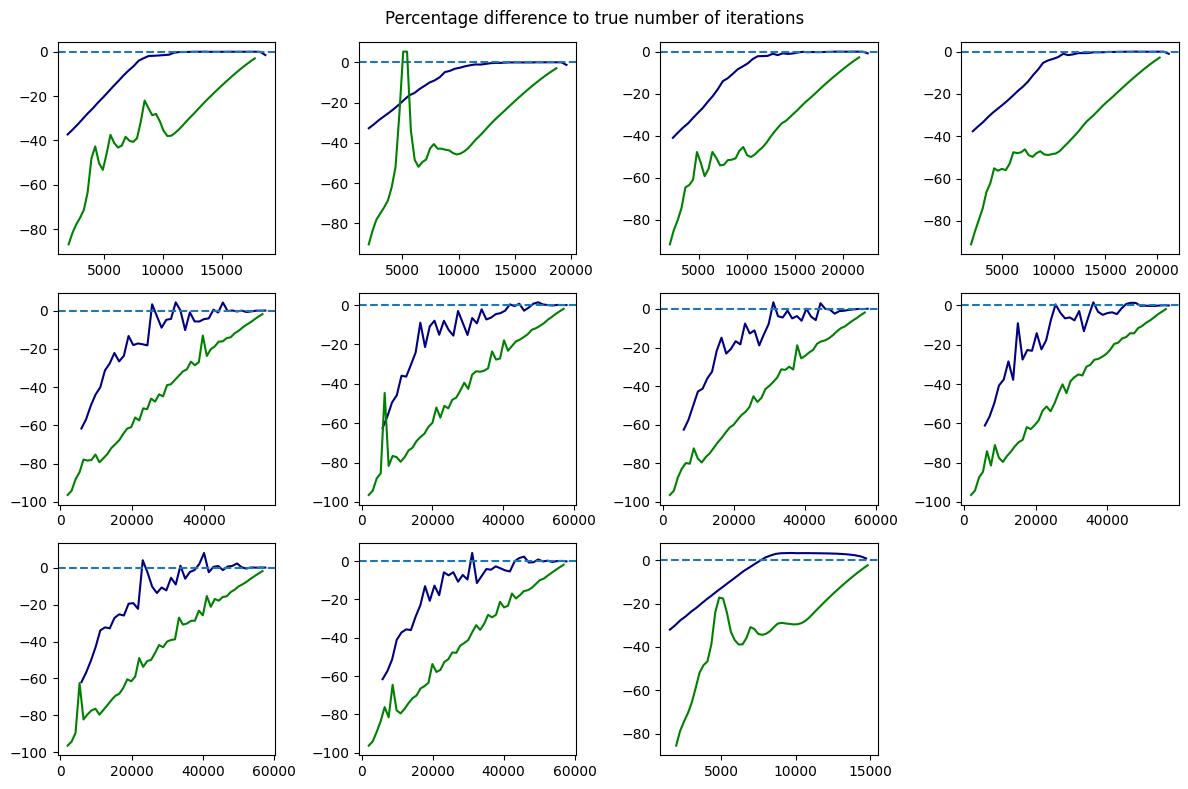

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    ax = axs[i]
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}_1')
    iterations_left = endpoints - iterations
    true_left = true_endpoint - iterations
    ax.plot(iterations, (endpoints/true_endpoint - 1) * 100, color='navy')
    ax.axhline(y=0, ls='--')

    iterations_linear, predictions_linear, _ = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    ax.plot(iterations_linear, (predictions_linear/true_endpoint - 1) * 100, color='green')
fig.suptitle('Percentage difference to true number of iterations')
fig.tight_layout()

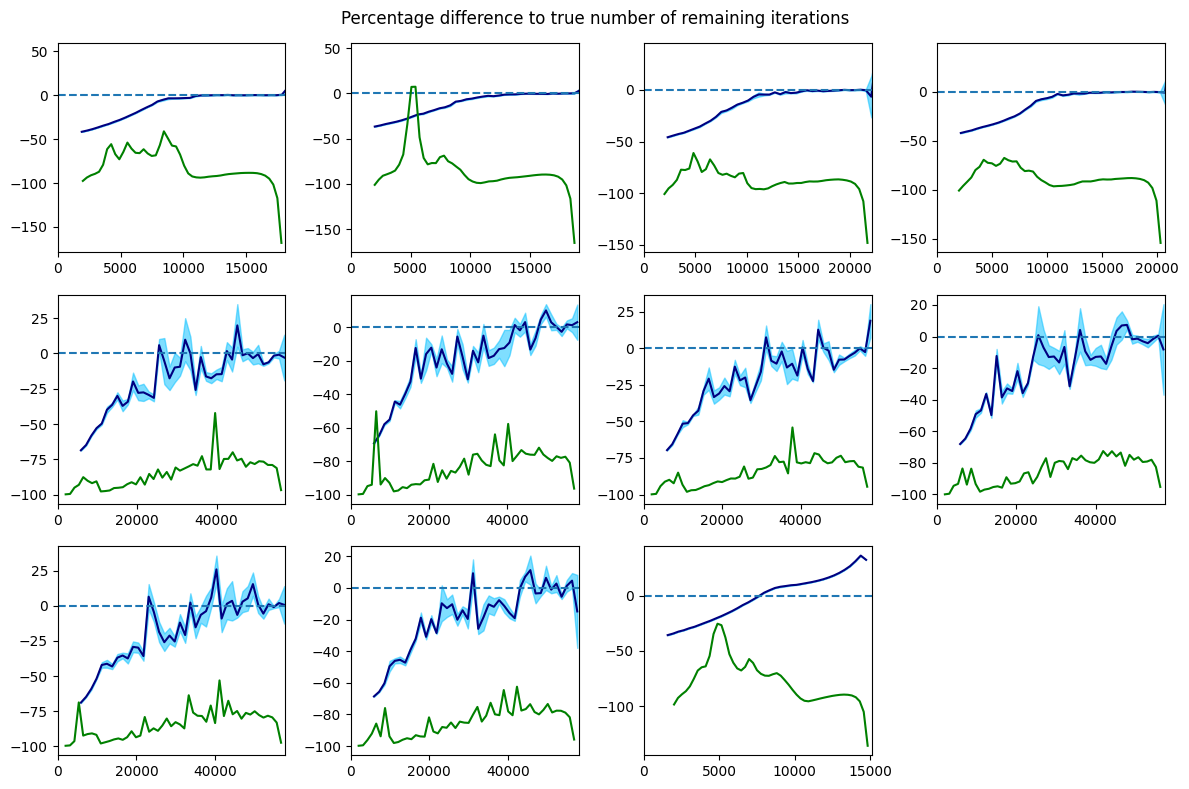

In [20]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    ax = axs[i]
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}_1')
    iterations_left = endpoints - iterations
    true_left = true_endpoint - iterations
    per_diff = (iterations_left/true_left - 1) * 100
    per_diff_low = ((iterations_left - endpoints_std)/true_left - 1) * 100
    per_diff_high = ((iterations_left + endpoints_std)/true_left - 1) * 100
    ax.plot(iterations, per_diff, color='navy')
    ax.fill_between(iterations, per_diff_low, per_diff_high, alpha=.5, color='deepskyblue')
    ax.axhline(y=0, ls='--')

    iterations_linear, predictions_linear, _ = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    ax.plot(iterations_linear, ((predictions_linear - iterations_linear)/(true_endpoint - iterations_linear) - 1) * 100, color='green')
    ax.set_xlim(0, true_endpoint)
fig.suptitle('Percentage difference to true number of remaining iterations')
fig.tight_layout()

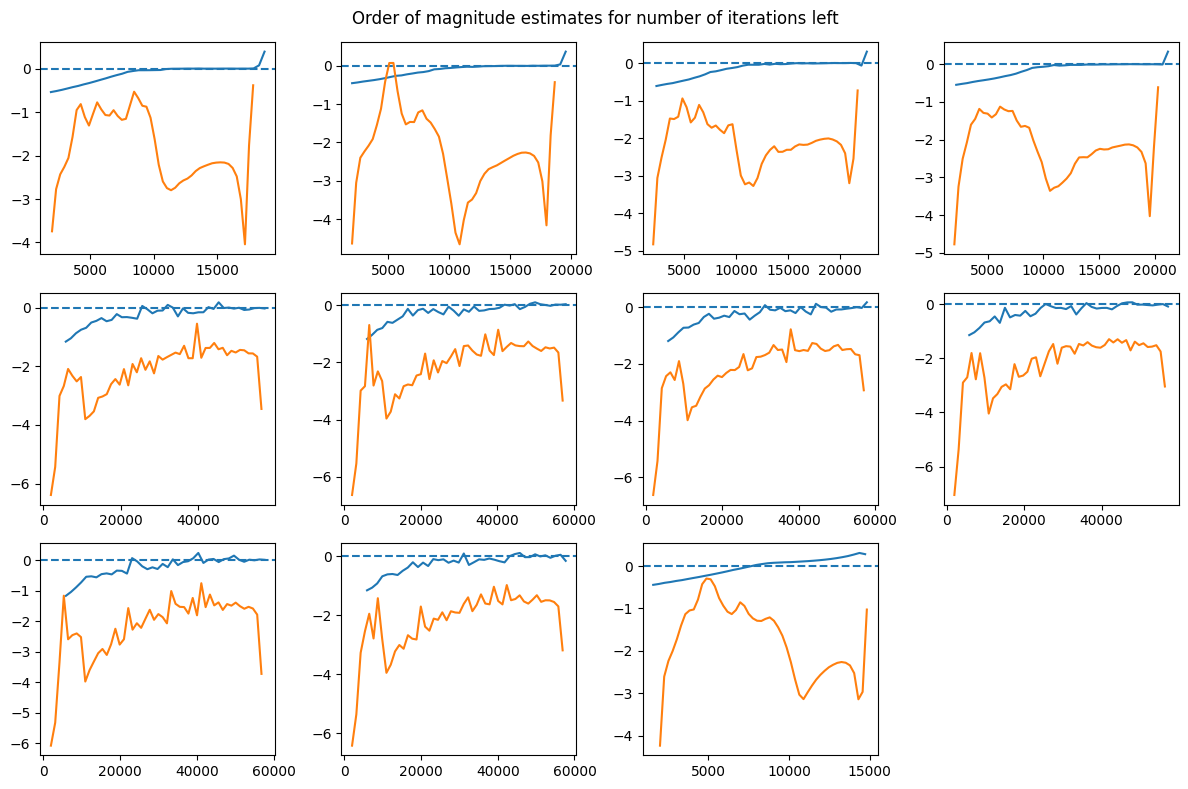

In [24]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    ax = axs[i]
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}_1')
    iterations_left = endpoints - iterations
    true_left = true_endpoint - iterations
    ax.plot(iterations, np.log(iterations_left/true_left))
    ax.axhline(y=0, ls='--')

    iterations_linear, predictions_linear, _ = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    ax.plot(iterations_linear, np.log(abs((predictions_linear - iterations_linear)/(true_endpoint - iterations_linear))))
fig.suptitle('Order of magnitude estimates for number of iterations left')
fig.tight_layout()

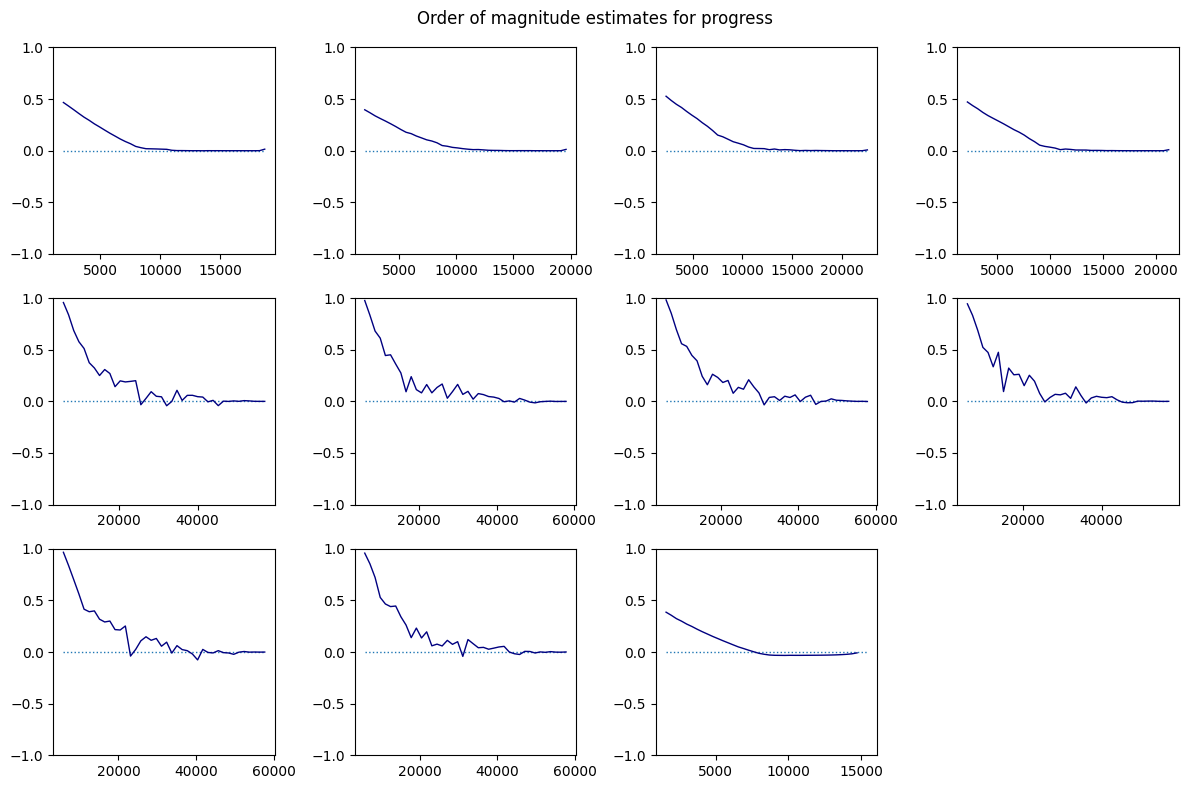

In [28]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(chains):
    name, samples = get_samples('lcdm', chain)
    iterations, endpoints, endpoints_std, true_endpoint = read_from_txt(f'lcdm_predictions_gauss/{name}_1')
    progress_true = iterations/true_endpoint
    progress_est = iterations/endpoints
    progress_lower = iterations/(endpoints+endpoints_std)
    progress_higher = iterations/(endpoints-endpoints_std)
    axs[i].plot(iterations, np.log(progress_true/progress_true), lw=1, ls=':')
    axs[i].plot(iterations, np.log(progress_est/progress_true), lw=1, color='navy')

    iterations_linear, predictions_linear, _ = read_from_txt(f'lcdm_predictions_linear/{name}_1')
    # axs[i].plot(iterations_linear, np.log(true_endpoint/predictions_linear), color='green', lw=1)
    axs[i].set_ylim(-1, 1)
fig.suptitle('Order of magnitude estimates for progress')
fig.tight_layout()